In [16]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
import rasterio
import os
import datetime
from datetime import timedelta
from planet import api
from planet.api import filters
import json
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate bounding box polygons from cropped images
# for index, row in df.iterrows():
#     image_path = row.image_path
#     with rasterio.open(image_path) as src:
#         bounds = src.bounds
#         crs = src.crs
#     bbox = box(bounds.left, bounds.bottom, bounds.right, bounds.top)
#     gseries = gpd.GeoSeries([bbox])
#     gseries.crs = crs
#     gseries.to_file(image_path.replace('images', 'bboxes').replace('tif', 'geojson'), driver='GeoJSON')

In [3]:
all_files_csv = '/datasets/rpartsey/satellite/planet/smart_crop/all_files.csv'

In [4]:
df = pd.read_csv(all_files_csv, parse_dates=['date'], date_parser=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [5]:
df.head()

,date,image_path,mask_path,bbox_path,label
0,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
1,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
2,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
3,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
4,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1


In [6]:
one_day = timedelta(days=1)

df['day_before'] = df['date'] - one_day
df['day_after'] = df['date'] + one_day

In [7]:
df.head()

,date,image_path,mask_path,bbox_path,label,day_before,day_after
0,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1,2017-03-10,2017-03-12
1,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1,2017-03-10,2017-03-12
2,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1,2017-03-10,2017-03-12
3,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1,2017-03-10,2017-03-12
4,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1,2017-03-10,2017-03-12


In [8]:
df.to_csv('/datasets/rpartsey/satellite/planet/smart_crop/ready_for_api.csv', index=False)

In [4]:
DATE_TEMPLATE = '%Y-%m-%d'
all_files_csv = '/datasets/rpartsey/satellite/planet/smart_crop/all_files.csv'
df = pd.read_csv(all_files_csv, parse_dates=['date'], date_parser=lambda x: datetime.datetime.strptime(x, DATE_TEMPLATE))

In [5]:
df.head(10)

,date,image_path,mask_path,bbox_path,label
0,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
1,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
2,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
3,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
4,2017-03-11,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
5,2017-03-28,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
6,2017-03-28,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
7,2017-03-28,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
8,2017-03-28,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1
9,2017-03-28,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,/datasets/rpartsey/satellite/planet/smart_crop...,1


In [6]:
PLANET_API_KEY = os.getenv('PLANET_API_KEY')
client = api.ClientV1(api_key=PLANET_API_KEY)

In [7]:
counts = []

one_day = timedelta(days=1)
LIMIT = 10

for index, row in df.iterrows(): 

    bbox_path = row.bbox_path
    date = row.date
    
    # day_before = (date - one_day).strftime(DATE_TEMPLATE)
    # two_weeks_before = (date - 14 * one_day).strftime(DATE_TEMPLATE)
    
    day_after = (date + one_day).strftime(DATE_TEMPLATE)
    two_weeks_after = (date + 14 * one_day).strftime(DATE_TEMPLATE)
    
    shape = gpd.read_file(bbox_path).to_crs(epsg=4326)
    json_poly = shape.geometry.to_json()
    aoi = json.loads(json_poly)["features"][0]["geometry"]
    
    
    query = filters.and_filter(
        filters.geom_filter(aoi),
        filters.range_filter('cloud_cover', lt=0.35),
        filters.and_filter(
            filters.date_range('acquired', lt=two_weeks_after),
            filters.date_range('acquired', gt=day_after),
        )
    )
    
    request = filters.build_search_request(
        query, item_types=['PSScene4Band']
    )
    result = client.quick_search(request)
    
    counts.append(len(list(result.items_iter(limit=LIMIT))))
    sleep(1)
    
#     for i, item in enumerate(result.items_iter(limit=15)):
#         props = item['properties']
#         print(i, '{0},{cloud_cover},{acquired}\n'.format(item['id'], **props))
        
    

In [8]:
counts = np.array(counts)

In [17]:
counts

array([ 0,  0,  0,  0,  0,  1,  3,  2,  2,  2,  3,  2,  2,  2,  2,  2,  2,
        4,  3,  4,  3,  5,  2,  4,  2,  3,  3,  3,  3,  2,  3,  4,  1,  2,
        3,  3,  2,  4,  4,  4,  4,  4,  3,  4,  4,  4,  3,  2,  2,  3,  4,
        3,  3,  2,  2,  3,  3,  5,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  3,  4,  6,  3,  1,  2,  4,  4,  4,  2,  2,  3,  3,  4,  4,  4,
        4,  3,  3,  3,  2,  3,  5,  4,  4,  4,  3,  2,  3,  1,  3,  3,  3,
        4,  5,  5,  3,  4,  1,  1,  3,  3,  2,  2,  2,  4,  4,  8,  4,  8,
        4,  7,  8,  7,  5,  5,  6,  6,  0,  5,  6,  4,  5,  6,  6,  5,  6,
        6,  4,  4,  4,  5,  5,  5,  3,  5,  3,  3,  4,  4,  5,  4,  2,  5,
        4,  4,  3,  4,  4,  2,  1,  4,  4,  3,  4,  2,  2,  2,  3,  2,  3,
        1,  2,  2,  1,  1,  2,  1,  2,  4,  2,  3,  4,  3,  2,  2,  1,  2,
        7,  6,  4,  4,  5,  6,  4,  6,  7,  6,  8,  6,  5,  6,  5,  5,  5,
        3,  4,  5,  5,  6,  6,  3,  3,  1,  1,  1,  2,  2,  1,  1,  2,  2,
        1,  1,  2,  0,  1

(array([ 30.,  67., 111., 133., 106.,  61.,  38.,  26.,  20., 188.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

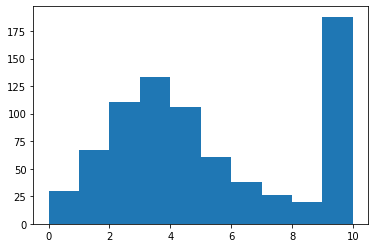

In [18]:
plt.hist(counts)

In [32]:
df[(counts <= 2)].to_csv('/datasets/rpartsey/satellite/planet/smart_crop/ploblematic_files_lte2.csv', index=False)

In [134]:
len(list(result.items_iter(limit=15)))

6

In [12]:
row = df.iloc[0]

bbox_path = row.bbox_path
day_before = row.day_before

row

date                                                 2017-03-11
image_path    /datasets/rpartsey/satellite/planet/smart_crop...
mask_path     /datasets/rpartsey/satellite/planet/smart_crop...
bbox_path     /datasets/rpartsey/satellite/planet/smart_crop...
label                                                         1
day_before                                           2017-03-10
day_after                                            2017-03-12
Name: 0, dtype: object

In [13]:
shape = gpd.read_file(bbox_path)
shape

,geometry
0,"POLYGON ((646572.000 5539761.000, 646572.000 5..."


In [14]:
shape = shape.to_crs(epsg=4326)
shape

,geometry
0,"POLYGON ((35.04492 49.99214, 35.04538 50.00306..."


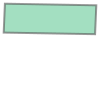

In [15]:
poly = shape.geometry[0]
poly

In [16]:
bbox_path

'/datasets/rpartsey/satellite/planet/smart_crop/with_mask/bboxes/spring-20170311_075415_0e0f-0.geojson'

In [17]:
shape.geometry

0    POLYGON ((35.04492 49.99214, 35.04538 50.00306...
Name: geometry, dtype: geometry

In [18]:
json_poly = shape.geometry.to_json()
aoi = json.loads(json_poly)["features"][0]["geometry"]

In [19]:
json_poly

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[35.044920674497035, 49.992143287242335], [35.04538410527267, 50.00306409801688], [35.01082682928814, 50.00366833795902], [35.01037121532223, 49.992747294859676], [35.044920674497035, 49.992143287242335]]]}, "bbox": [35.01037121532223, 49.992143287242335, 35.04538410527267, 50.00366833795902]}], "bbox": [35.01037121532223, 49.992143287242335, 35.04538410527267, 50.00366833795902]}'

In [20]:
aoi

{'type': 'Polygon',
 'coordinates': [[[35.044920674497035, 49.992143287242335],
   [35.04538410527267, 50.00306409801688],
   [35.01082682928814, 50.00366833795902],
   [35.01037121532223, 49.992747294859676],
   [35.044920674497035, 49.992143287242335]]]}

In [21]:
aoi

{'type': 'Polygon',
 'coordinates': [[[35.044920674497035, 49.992143287242335],
   [35.04538410527267, 50.00306409801688],
   [35.01082682928814, 50.00366833795902],
   [35.01037121532223, 49.992747294859676],
   [35.044920674497035, 49.992143287242335]]]}

In [33]:
filters.date_range('acquired', lt=day_before)

{'field_name': 'acquired',
 'type': 'DateRangeFilter',
 'config': {'lt': '2017-03-10T00:00:00Z'}}

In [100]:
query = filters.and_filter(
    filters.geom_filter(aoi),
    filters.range_filter('cloud_cover', lt=0.3),
#     filters.date_range('acquired', lt=day_before)
    filters.and_filter(
        filters.date_range('acquired', lt=day_before),
        filters.date_range('acquired', gt='2017-03-01'),
    )
)

In [101]:
query

{'type': 'AndFilter',
 'config': ({'field_name': 'geometry',
   'type': 'GeometryFilter',
   'config': {'type': 'Polygon',
    'coordinates': [[[35.044920674497035, 49.992143287242335],
      [35.04538410527267, 50.00306409801688],
      [35.01082682928814, 50.00366833795902],
      [35.01037121532223, 49.992747294859676],
      [35.044920674497035, 49.992143287242335]]]}},
  {'field_name': 'cloud_cover', 'type': 'RangeFilter', 'config': {'lt': 0.3}},
  {'type': 'AndFilter',
   'config': ({'field_name': 'acquired',
     'type': 'DateRangeFilter',
     'config': {'lt': '2017-03-10T00:00:00Z'}},
    {'field_name': 'acquired',
     'type': 'DateRangeFilter',
     'config': {'gt': '2017-03-01T00:00:00Z'}})})}

In [102]:
request = filters.build_search_request(
    query, item_types=['PSScene4Band']
)

In [103]:
result = client.quick_search(request)

In [104]:
for i, item in enumerate(result.items_iter(limit=15)):
    props = item['properties']
    print(i, '{0},{cloud_cover},{acquired}\n'.format(item['id'], **props))

0 20170304_064903_1_0c79,0.05,2017-03-04T06:49:03.950421Z

1 20170307_075339_0e20,0.05,2017-03-07T07:53:39.056621Z

2 20170307_075337_0e20,0.11,2017-03-07T07:53:37.977962Z

3 20170304_075417_0e0d,0.2,2017-03-04T07:54:17.318702Z

4 20170304_075519_0e3a,0.12,2017-03-04T07:55:19.971793Z

5 20170304_075518_0e3a,0.19,2017-03-04T07:55:18.876556Z



In [145]:
result.size

0

In [105]:
clip_request = {
    "name": "just clip3",
    "products": [
        {
            "item_ids": [
                "20170307_075337_0e20",
                "20170304_075417_0e0d",
                "20170304_075519_0e3a",
                "20170304_075518_0e3a"
            ],
            "item_type": "PSScene4Band",
            "product_bundle": "analytic"
        }
    ],
    "tools": [
        {
            "clip": {
                "aoi": {
                    "type": "Polygon",
                    "coordinates": [[[35.044920674497035, 49.992143287242335],
                                     [35.04538410527267, 50.00306409801688],
                                     [35.01082682928814, 50.00366833795902],
                                     [35.01037121532223, 49.992747294859676],
                                     [35.044920674497035, 49.992143287242335]]]
                }
            }
        }
    ],
      "delivery":{  
      "archive_filename":"{{name}}_{{order_id}}.zip",
      "archive_type":"zip",
}

In [106]:
order_model = client.create_order(clip_request)

In [107]:
order_model.get()

{'_links': {'_self': 'https://api.planet.com/compute/ops/orders/v2/bbeb8fee-387f-44a4-bd62-68eccc3c0ec0'},
 'created_on': '2020-05-06T14:21:20.788Z',
 'error_hints': [],
 'id': 'bbeb8fee-387f-44a4-bd62-68eccc3c0ec0',
 'last_message': 'Preparing order',
 'last_modified': '2020-05-06T14:21:20.788Z',
 'name': 'just clip3',
 'products': [{'item_ids': ['20170307_075337_0e20',
    '20170304_075417_0e0d',
    '20170304_075519_0e3a',
    '20170304_075518_0e3a'],
   'item_type': 'PSScene4Band',
   'product_bundle': 'analytic'}],
 'state': 'queued',
 'tools': [{'clip': {'aoi': {'coordinates': [[[35.044920674497035,
        49.992143287242335],
       [35.04538410527267, 50.00306409801688],
       [35.01082682928814, 50.00366833795902],
       [35.01037121532223, 49.992747294859676],
       [35.044920674497035, 49.992143287242335]]],
     'type': 'Polygon'}}}]}

In [59]:
orders = client.get_orders()

In [60]:
order = next(orders.items_iter(limit=1))

In [61]:
order

{'_links': {'_self': 'https://api.planet.com/compute/ops/orders/v2/571ce6c5-0b28-40fe-85ef-b318c56267e7'},
 'created_on': '2020-05-06T13:11:00.833Z',
 'error_hints': [],
 'id': '571ce6c5-0b28-40fe-85ef-b318c56267e7',
 'last_message': 'Waiting for manifest delivery to complete',
 'last_modified': '2020-05-06T13:16:44.518Z',
 'name': 'just clip',
 'products': [{'item_ids': ['20170304_064903_1_0c79', '20170307_075339_0e20'],
   'item_type': 'PSScene4Band',
   'product_bundle': 'analytic'}],
 'state': 'running',
 'tools': [{'clip': {'aoi': {'coordinates': [[[35.044920674497035,
        49.992143287242335],
       [35.04538410527267, 50.00306409801688],
       [35.01082682928814, 50.00366833795902],
       [35.01037121532223, 49.992747294859676],
       [35.044920674497035, 49.992143287242335]]],
     'type': 'Polygon'}}}]}

In [58]:
client.get_item?